In [22]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from os.path import join as oj

import dvu
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import ceil
from tqdm import tqdm
import numpy as np
import matplotlib.patches as patches
import sys
from math import log
from simulations_util import *
from collections import defaultdict
import pickle as pkl

sys.path.append('..')

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')

from experiments.viz import *
from experiments import viz

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
n_train = [100,250,500] #,750,1000,1500,2000,2500]
n_test = 500
d = 50
beta = 1
sigma = 0.1
sparsity = [10, 20]
n_avg = 25

In [24]:
# keys end up being saps, cart, rf
scores = defaultdict(list)
error_bar = defaultdict(list)

In [ ]:
#This cell's code is used to fit and predict for on linear model varying across the number of training samples/sparsity 
for s in sparsity:
    scores_s = defaultdict(list)
    error_bar_s = defaultdict(list)

    
    for n in tqdm(n_train):
        scores_s_n = defaultdict(list)
        error_bar_s_n = defaultdict(list)
        for j in range(n_avg):
            #Create data to fit models 
            X_train = sample_uniform_X(n,d)
            X_honest = sample_uniform_X(n,d)
            X_test = sample_uniform_X(n_test,d)
            y_train = sum_of_squares(X_train,s,beta,sigma)
            y_honest = sum_of_squares(X_honest,s,beta,sigma)
            y_test = sum_of_squares(X_test,s,beta,0) #zero noise since we want to measure ||\hat{f} - f||_2
            
            # fit and predict for all versions of CART
            saps_mse, cart_mse =  train_all_models(X_train,y_train,X_honest,y_honest,X_test,y_test)
            scores_s_n['SAPS'].append(saps_mse)
            scores_s_n['CART'].append(cart_mse)
            
            rf = RandomForestRegressor(n_estimators=100, max_features=0.33)
            rf.fit(X_train,y_train)
            rf_preds = rf.predict(X_test)
            scores_s_n['RF'].append(mean_squared_error(y_test,rf_preds))
            

        for k in scores_s_n:
            scores_s[k].append(np.mean(scores_s_n[k]))
            error_bar_s[k].append(np.mean(error_bar_s_n[k]))
    
    #save results 
    for k in scores_s:
        scores[k].append(scores_s[k])
        error_bar[k].append(error_bar_s[k])

  0%|          | 0/3 [00:00<?, ?it/s]

# save results

In [6]:
out_dir = 'results/sum_of_squares'
os.makedirs(out_dir, exist_ok=True)
with open(oj('results/sum_of_squares', 'scores.pkl'),'wb') as f:
    pkl.dump((scores, error_bar), f)

In [52]:
# CART_results = (CART_scores,CART_error_bar)
# with open('results/sum_of_squares/scores.pkl','wb') as f:
#     pkl.dump(CART_results,f)

In [53]:
# RF_results = (RF_scores,RF_error_bar)
# with open('results/sum_of_squares/RF.pkl','wb') as f:
#     pkl.dump(RF_results,f)

# plot results

In [ ]:
best_fits = defaultdict(list)
for k in scores.keys():
    for (i, s) in enumerate(sparsity):
    #     honest_CART_best_fit.append(get_best_fit_line(log_list(n_train),log_list(honest_CART_scores[i])))
#         best_fits.append(get_best_fit_line(log_list(n_train),log_list(CART_scores[i])))
#         RF_best_fit.append(get_best_fit_line(log_list(n_train),log_list(RF_scores[i])))
        best_fits[k].append(get_best_fit_line(log_list(n_train), log_list(scores[k][i])))

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set global plotting parameters
plt.style.use("fivethirtyeight")
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 20
# pylab.rcParams['xtick.major.pad'] = 5
# pylab.rcParams['ytick.major.pad'] = 5
mpl.rcParams["figure.figsize"] = [8, 6]
mpl.rcParams['savefig.transparent'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'black'
# plt.rcParams['patch.edgecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['grid.color'] = 'black'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

label_size = 25
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

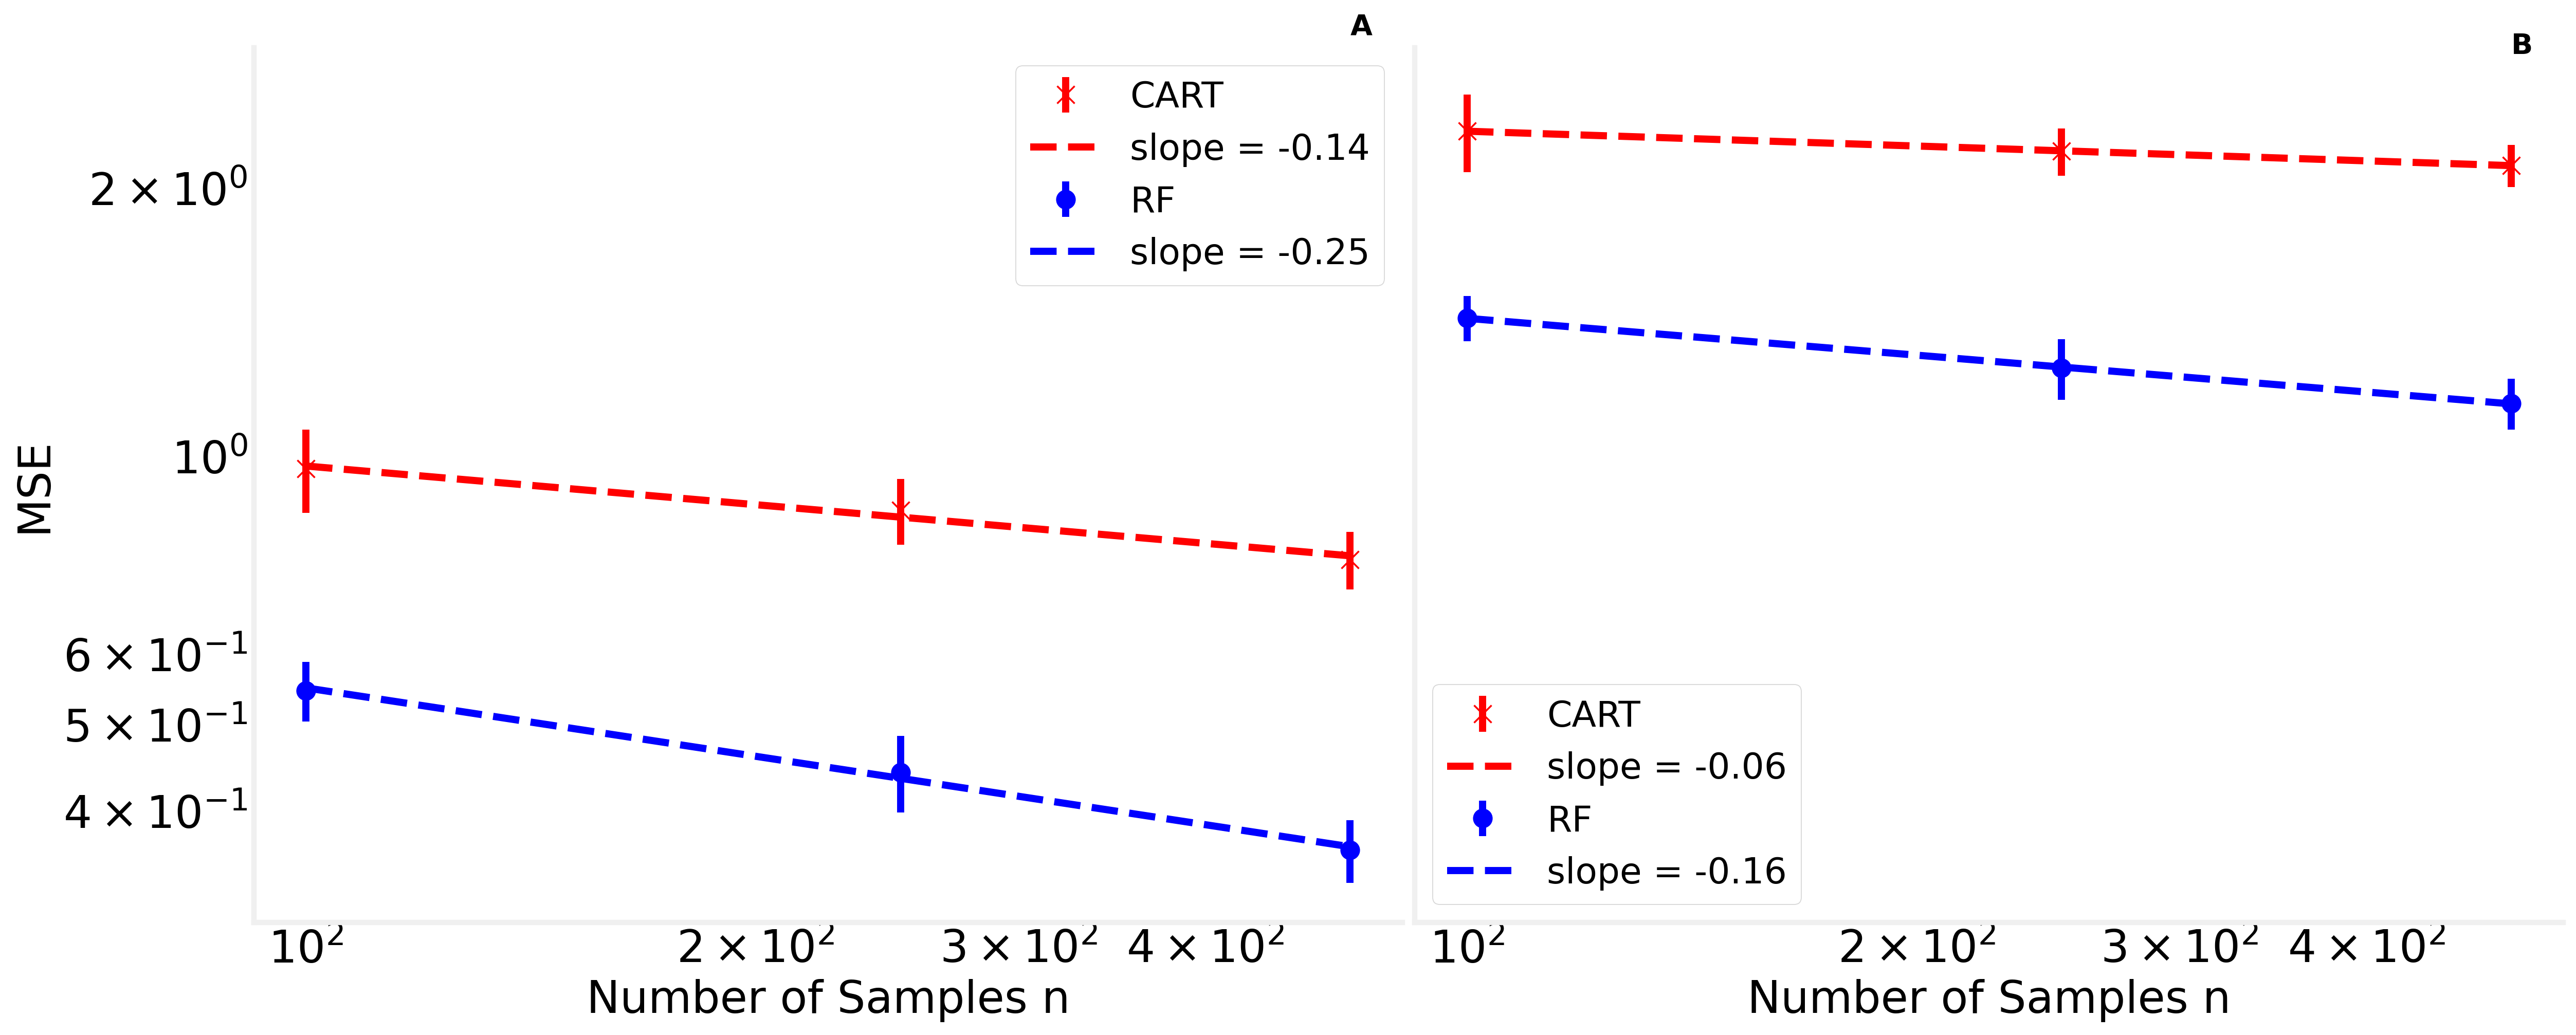

In [66]:
sum_squares_fig,sum_squares_axs = plt.subplots(1,2,figsize = (20,8),sharex = True,sharey = True)


#Plot Performance for different models 

# s = 10
# sum_squares_axs[0].errorbar(n_train,honest_CART_scores[0],yerr = honest_CART_error_bar[0],fmt = '^',label = 'honest CART',color = 'green')
# sum_squares_axs[0].errorbar(n_train,pow(math.e,honest_CART_best_fit[0][0]*np.array(log_list(n_train))+honest_CART_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' +str(honest_CART_best_fit[0][0])[:5],color = 'green')

sum_squares_axs[0].errorbar(n_train,CART_scores[0],yerr = CART_error_bar[0],fmt = 'x',label = 'CART',color = 'red')
sum_squares_axs[0].errorbar(n_train,pow(math.e,CART_best_fit[0][0]*np.array(log_list(n_train))+CART_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' + str(CART_best_fit[0][0])[:5],color = 'red')


sum_squares_axs[0].errorbar(n_train,RF_scores[0],yerr = RF_error_bar[0],fmt = 'o',label = 'RF',color = 'blue')
sum_squares_axs[0].errorbar(n_train,pow(math.e,RF_best_fit[0][0]*np.array(log_list(n_train))+RF_best_fit[0][1]),linestyle = 'dashed',label = 'slope = ' + str(RF_best_fit[0][0])[:5],color = 'blue')



# s = 20 
# sum_squares_axs[1].errorbar(n_train,honest_CART_scores[1],yerr = honest_CART_error_bar[0],fmt = '^',label = 'honest CART',color = 'green')
# sum_squares_axs[1].errorbar(n_train,pow(math.e,honest_CART_best_fit[1][0]*np.array(log_list(n_train))+honest_CART_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' +str(honest_CART_best_fit[1][0])[:5],color = 'green')

sum_squares_axs[1].errorbar(n_train,CART_scores[1],yerr = CART_error_bar[1],fmt = 'x',label = 'CART',color = 'red')
sum_squares_axs[1].errorbar(n_train,pow(math.e,CART_best_fit[1][0]*np.array(log_list(n_train))+CART_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' + str(CART_best_fit[1][0])[:5],color = 'red')


sum_squares_axs[1].errorbar(n_train,RF_scores[1],yerr = RF_error_bar[1],fmt = 'o',label = 'RF',color = 'blue')
sum_squares_axs[1].errorbar(n_train,pow(math.e,RF_best_fit[1][0]*np.array(log_list(n_train))+RF_best_fit[1][1]),linestyle = 'dashed',label = 'slope = ' +str(RF_best_fit[1][0])[:5],color = 'blue')



sum_squares_axs[0].legend(loc = 'best')
sum_squares_axs[1].legend(loc = 'best')

sum_squares_axs[0].text(500.0, 3.15, 'A',
      fontsize=16, fontweight='bold', va='top')
sum_squares_axs[1].text(500.0, 3.15, 'B',
      fontsize=16, fontweight='bold', va='top')
sum_squares_axs[0].set_ylabel('MSE',fontsize = 25)
#linear_lower_bound_axs[1].set_ylabel('MSE',fontsize = 18)

plt.rcParams['legend.fontsize'] = 20

sum_squares_axs[0].set_xlabel('Number of Samples n',fontsize = 25)
sum_squares_axs[1].set_xlabel('Number of Samples n',fontsize = 25)

sum_squares_axs[0].set_yscale('log')
sum_squares_axs[1].set_yscale('log')
sum_squares_axs[0].set_xscale('log')
sum_squares_axs[1].set_xscale('log')

sum_squares_axs[0].grid()
sum_squares_axs[1].grid()



plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')


labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
ytick = [0.2,0.5,1.0,3.0]
#plt.xticks(n_train, labels, rotation='vertical')


#linear_lower_bound_axs[0].set_yticks([0.1, 0.5, 1.0,3.0])
plt.yticks(ytick,labels)
plt.show()